Epoch 1/20, Loss: 2.4942
Epoch 2/20, Loss: 2.3416
Epoch 3/20, Loss: 2.2456
Epoch 4/20, Loss: 2.1835
Epoch 5/20, Loss: 2.1335
Epoch 6/20, Loss: 2.0875
Epoch 7/20, Loss: 2.0408
Epoch 8/20, Loss: 1.9908
Epoch 9/20, Loss: 1.9372
Epoch 10/20, Loss: 1.8803
Epoch 11/20, Loss: 1.8213
Epoch 12/20, Loss: 1.7620
Epoch 13/20, Loss: 1.7016
Epoch 14/20, Loss: 1.6383
Epoch 15/20, Loss: 1.5714
Epoch 16/20, Loss: 1.5021
Epoch 17/20, Loss: 1.4315
Epoch 18/20, Loss: 1.3587
Epoch 19/20, Loss: 1.2838
Epoch 20/20, Loss: 1.2092
Test Accuracy: 0.8528
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.70      0.68      0.69        28
           2       0.81      0.88      0.84        33
           3       0.94      0.88      0.91        34
           4       0.96      1.00      0.98        46
           5       0.91      0.68      0.78        47
           6       0.91      0.91      0.91        35
           7       0.92      0.97 

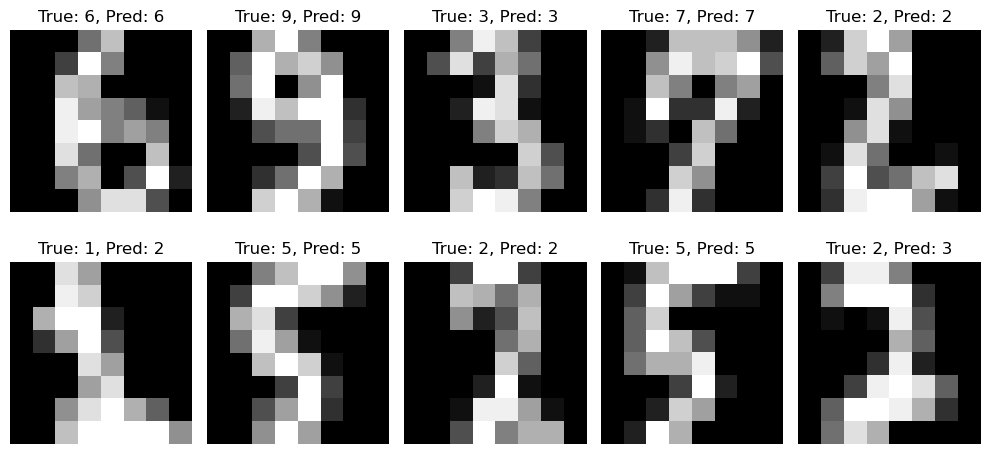

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. 데이터 로딩
digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images  # (n_samples, 8, 8)
y = digits.target  # (n_samples,)

# 2. train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 텐서 변환 (CNN용으로 채널 차원 추가)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # (batch, 1, 8, 8)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 4. CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),  # (8x8) → (8x8)
            nn.ReLU(),
            nn.MaxPool2d(2),  # (8x8) → (4x4)

            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # (4x4) → (4x4)
            nn.ReLU(),
            nn.MaxPool2d(2)  # (4x4) → (2x2)
        )
        self.fc = nn.Sequential(
            nn.Linear(32 * 2 * 2, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

model = CNN()

# 5. 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. 학습
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 7. 평가
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")
    print(metrics.classification_report(y_test_tensor, predicted))

# 8. 예측 결과 시각화
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {predicted[i].item()}")
    ax.axis('off')
plt.tight_layout()
plt.show()
